In [ ]:
#https://www.kaggle.com/code/rehabahmedkhalifa/credit-classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
df=pd.read_csv("credit_train.csv" ,sep="," ,encoding="utf-8")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [ ]:
df = df.dropna(subset=['Credit Score', 'Annual Income'])
df['Months since last delinquent']=df['Months since last delinquent'].fillna(0)
df['Bankruptcies']=df['Bankruptcies'].fillna(0)
df = df.drop_duplicates(subset=['Loan ID'])
df['Credit Score'] = df['Credit Score'].astype(int)

#Convert 'Credit Score' to string and remove last digit if it has four digits
# for i in range(len(df['Credit Score'])):
#     # Check if the length of the value is 4 digits
#     print(len(str(df['Credit Score'][i])))
#     if len(str(df['Credit Score'][i])) == 4:
#         #print(str(df['Credit Score'][i]))
#         # Remove the last digit
#         df['Credit Score'][i] = int(str(df['Credit Score'][i])[:-1])

#df['modified_credit_scores'] = [int(str(score)[:3] + str(score)[4:]) if str(score)[3] == '0' else score for score in df['Credit Score']]

df['Credit Score Modified'] = df['Credit Score'].astype(str).apply(lambda x: x[:-1] if len(x) == 4 else x)

# Convert 'Credit Score' back to numeric type
#df['Credit Score'] = pd.to_numeric(df['Credit Score'], errors='coerce')
df.drop(df[["Tax Liens"]] ,axis =1 ,inplace =True)
df["Debt to Income Ratio"] = df["Monthly Debt"]/(df["Annual Income"]/12)
df.info()
df.to_csv('cleaned.csv', index=False)



5


KeyError: 1

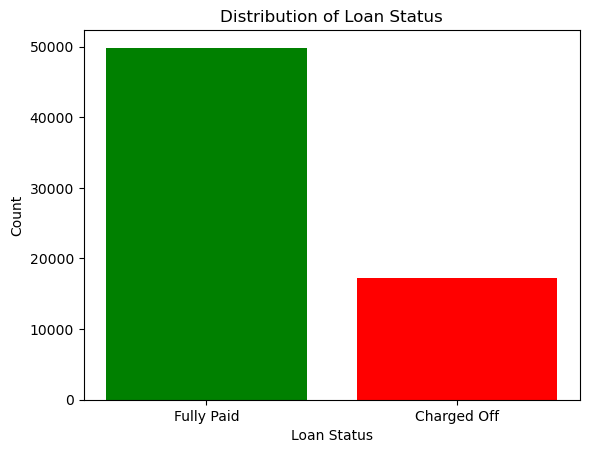

In [48]:
status_counts = df['Loan Status'].value_counts()
plt.bar(status_counts.index, status_counts.values, color=['green', 'red'])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

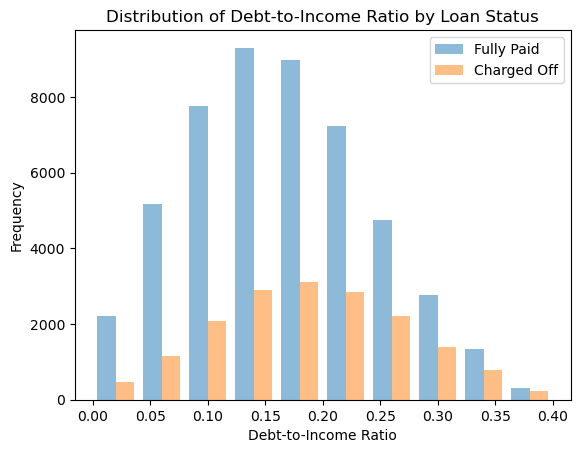

In [59]:
#Debt to Income Ratio by Loan Status

grouped_data = df.groupby('Loan Status')['Debt to Income Ratio']

# Create a histogram for each group
plt.hist([grouped_data.get_group(status) for status in df['Loan Status'].unique()],
         bins=10, alpha=0.5, label=df['Loan Status'].unique())

# Adding labels and title
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Debt-to-Income Ratio by Loan Status')

# Adding legend
plt.legend()

# Show the plot
plt.show()